In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autumn.tools.dynamic_proportions.solve_transitions import calculate_transition_rates_from_dynamic_props
from summer import CompartmentalModel

## Request proportions over time and estimate parameters

In [15]:
# Requested proportions over time
props_df = pd.DataFrame(
    data={ 
        "A":[1., .2, .2, .2], 
        "B":[0., .8, .6, .7], 
        "C":[0., .0, .2, .1]
    },
    index = [0, 100 , 150, 175]
)

# List of transtion flows
active_flows = [
    "A_to_B", 
    "B_to_C", 
    "C_to_B"
]
  
sc_functions = calculate_transition_rates_from_dynamic_props(props_df, active_flows)

## Build a dynamic compartmental model and compare outputs to user requests

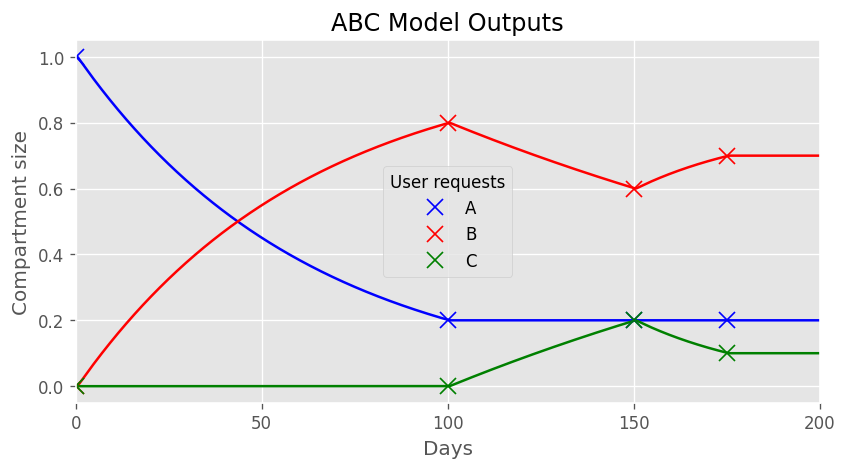

In [16]:
# Define a basic compartmental model
model = CompartmentalModel(
    times=[0, 200],
    compartments=["A", "B", "C"],
    infectious_compartments=["A"],
    timestep=0.1,
)
model.set_initial_population(distribution={"A": 1})
model.add_transition_flow(name="A_to_B", fractional_rate=sc_functions["A_to_B"], source="A", dest="B")
model.add_transition_flow(name="B_to_C", fractional_rate=sc_functions["B_to_C"], source="B", dest="C")
model.add_transition_flow(name="C_to_B", fractional_rate=sc_functions["C_to_B"], source="C", dest="B")

# Run the model
model.run()


# Visualize the results.
subplot = {"title": "ABC Model Outputs", "xlabel": "Days", "ylabel": "Compartment size"}
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=120, subplot_kw=subplot)
colors = ["blue", "red", "green"]

plt.style.use("ggplot")
ax.legend(["A", "B", "C"], title="User requests")

# Plot the modelled proportions over time
for compartment_idx in range(model.outputs.shape[1]):
    ax.plot(model.times, model.outputs.T[compartment_idx], color=colors[compartment_idx])

ax.set_xticks([0,50,100,150,200])

# Plot the requested proportions
props_df.plot(ax=ax, marker="x", ms=10, lw=0, color=colors)

plt.show()